## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

In [2]:
def model_JCAL(rho_0, alpha_inf, sigma_rf,
              phi, eta, lamb, omega,
              gamma, P_0, Pr, lamb_linha,
              q_0, q_0_linha):

   omega=omega*2*np.pi

   rho_omega = ((rho_0*alpha_inf)/1)*(1+(((eta*phi)/(1j*omega*rho_0*q_0*alpha_inf))*np.sqrt(1+(1j*((4*omega*rho_0*(alpha_inf**2)*(q_0**2))/((eta)*(lamb**2)*(phi**2)))))))

   K_omega = (gamma*P_0)/(gamma - ((gamma-1)*((1+(((phi*eta)/(1j*omega*Pr*rho_0*q_0_linha))*np.sqrt(1+((1j*4*omega*Pr*rho_0*(q_0_linha**2))/(eta*(lamb_linha**2)*(phi**2))))))**(-1))))

   return rho_omega, K_omega

In [15]:
def calc_Zspp(rho, K, omega, rho_0, t_linha, theta, Z_0, c_0, D, d_m):
  # t_linha = t_prime + 1.7 * a
  omega=omega*2*np.pi
  Z_c = np.sqrt(rho*K)
  k_c = omega * np.sqrt(rho/K)
  m_linha = (rho_0*t_linha)/theta
  k_0 =(omega*2*np.pi)/c_0
  Z_cam = -1j*Z_0*(1/np.tan(k_0*(D-d_m)))
  Z_spp = (1j*omega*m_linha)+(((-1j*Z_cam*Z_c*(1/np.tan(k_c*d_m)))+(Z_c**2))/(Z_cam-(1j*Z_c*(1/np.tan(k_c*d_m)))))
  return Z_spp

## Definição de Parâmetros

In [4]:
## Propriedades do Material Poroso (Melamina)
sigma_rf = 12627 #Resistividade ao Fluxo
phi = 0.9 #Porosidade
alpha_inf = 1 #Tortuosidade
lamb = 91e-6 #Comprimento Característico Viscoso
lamb_linha = 148e-6 #Comprimento Característico Térmico
rho_m = 10 #Densidade do Material
q_0 = 14.57e-10 #Permeabilidade Estática Viscosa
q_0_linha = 14.57e-10 #Permeabilidade Térmica

In [5]:
## Propriedades do Fluido (Ar)
P_0 = 101320 #Pressão Atmosférica
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
gamma = 1.4 #Razão entre Capacidades Térmicas
eta = 1.84e-5 #Viscosidade Dinãmica do ar
Pr = 0.71 #Número de Prandtl
Z_0 = rho_0*c_0 #Impedância do ar

In [6]:
## Propriedades do Painel Perfurado
a_rp = 5e-3/2 ##Raio da Perfuração
b = 14e-3 ##Separação entre os Centros das Perfurações
theta_fixed = 0.1 ##Porosidade (Casos 2, 3 e 4)
D_fixed = 10e-2 ##Espessura Total
t_linha_fixed = 2.5e-2 ##Espessura Corrigida da Placa
d_m_fixed = 25e-3 ##Espessura da Camada de Material Poroso

## Definindo os Indicadores do Material Poroso

In [7]:
omega = np.arange(100,4000,1)
## Cáluclo da Densidade Efetiva e Módulo de Compressinilidade Efetivo - Modelo JCAL
rho_pm, K_pm = model_JCAL(rho_0=rho_0,
                          alpha_inf=alpha_inf,
                          sigma_rf=sigma_rf,
                          phi=phi,
                          eta=eta,
                          lamb=lamb,
                          omega=omega,
                          gamma=gamma,
                          P_0=P_0,
                          Pr=Pr,
                          lamb_linha=lamb_linha,
                          q_0=q_0,
                          q_0_linha=q_0_linha)

## Caso 1: Variação da Porosidade $\Theta$


In [17]:
## Definindo todas as Possibilidades de Theta
all_theta = [0.05, 0.1, 0.25, 0.5]
## Calculando o Coeficiente de Absorção
alpha_case1=[]
for theta in all_theta:
  Zspp_var = calc_Zspp(
      rho=rho_pm,
      K=K_pm,
      omega=omega,
      rho_0=rho_0,
      t_linha=t_linha_fixed,
      theta=theta,
      Z_0=Z_0,
      c_0=c_0,
      D=D_fixed,
      d_m=d_m_fixed
  )
  alpha_var = 1-(np.abs((Zspp_var-Z_0)/(Zspp_var+Z_0))**2)
  alpha_case1.append(alpha_var)

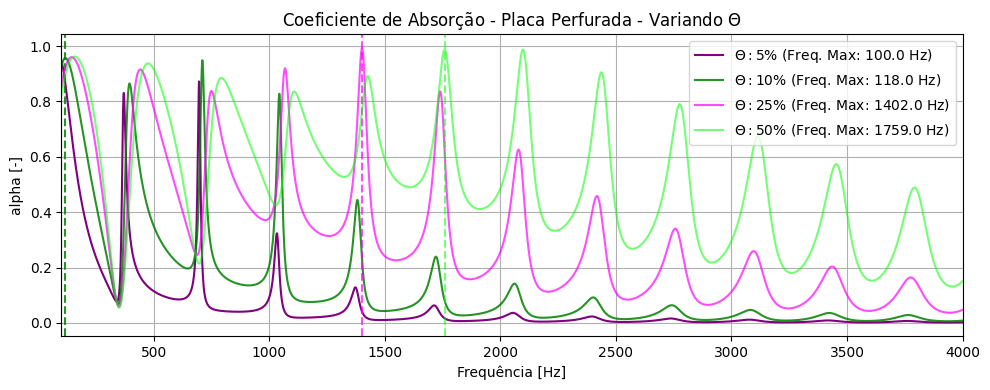

In [46]:
labels=['$\Theta:5\%$', '$\Theta:10\%$', '$\Theta:25\%$', '$\Theta:50\%$']
colors = ['purple', 'green', 'magenta', 'lime']
## Plot da Coeficiente de Absorção - Caso 1
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
for i,alpha in enumerate(alpha_case1):
    max_idx = np.argmax(alpha)
    max_freq = omega[max_idx]
    ax.plot(omega, alpha, label=f'{labels[i]} (Freq. Max: {max_freq:.1f} Hz)', color=colors[i], alpha=1 - i*0.15)
    ax.axvline(max_freq, color=colors[i], linestyle='--', alpha=1 - i*0.15)
ax.set_title('Coeficiente de Absorção - Placa Perfurada - Variando $\Theta$')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([100,4000])
ax.grid(True)
ax.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

## Caso 2: Variação da Espessura da Cavida D



In [31]:
## Definindo todas as Possibilidades de D
all_D = [7e-2,10e-2,20e-2]
## Calculando o Coeficiente de Absorção
alpha_case2=[]
for D in all_D:
  Zspp_var = calc_Zspp(
      rho=rho_pm,
      K=K_pm,
      omega=omega,
      rho_0=rho_0,
      t_linha=t_linha_fixed,
      theta=theta_fixed,
      Z_0=Z_0,
      c_0=c_0,
      D=D,
      d_m=d_m_fixed
  )
  alpha_var = 1-(np.abs((Zspp_var-Z_0)/(Zspp_var+Z_0))**2)
  alpha_case2.append(alpha_var)

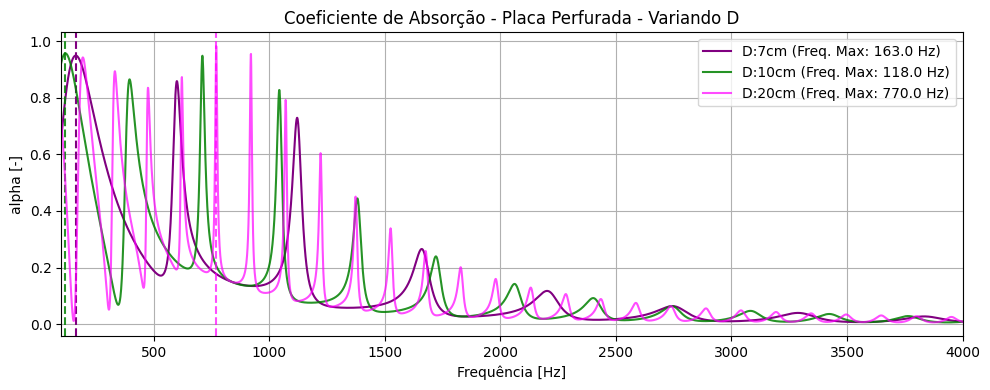

In [47]:
labels=['D:7cm','D:10cm','D:20cm']
colors = ['purple', 'green', 'magenta']
## Plot da Coeficiente de Absorção - Caso 1
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
for i,alpha in enumerate(alpha_case2):
    max_idx = np.argmax(alpha)
    max_freq = omega[max_idx]
    ax.plot(omega, alpha, label=f'{labels[i]} (Freq. Max: {max_freq:.1f} Hz)', color=colors[i], alpha=1 - i*0.15)
    ax.axvline(max_freq, color=colors[i], linestyle='--', alpha=1 - i*0.15)
ax.set_title('Coeficiente de Absorção - Placa Perfurada - Variando D')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([100,4000])
ax.grid(True)
ax.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

## Caso 3: Variação da Espessura da Placa Corrigida t'

In [39]:
## Definindo todas as Possibilidades de t'
all_t_linha = [0.2e-2, 1e-2, 5e-2]
## Calculando o Coeficiente de Absorção
alpha_case3=[]
for t_linha in all_t_linha:
  Zspp_var = calc_Zspp(
      rho=rho_pm,
      K=K_pm,
      omega=omega,
      rho_0=rho_0,
      t_linha=t_linha,
      theta=theta_fixed,
      Z_0=Z_0,
      c_0=c_0,
      D=D_fixed,
      d_m=d_m_fixed
  )
  alpha_var = 1-(np.abs((Zspp_var-Z_0)/(Zspp_var+Z_0))**2)
  alpha_case3.append(alpha_var)

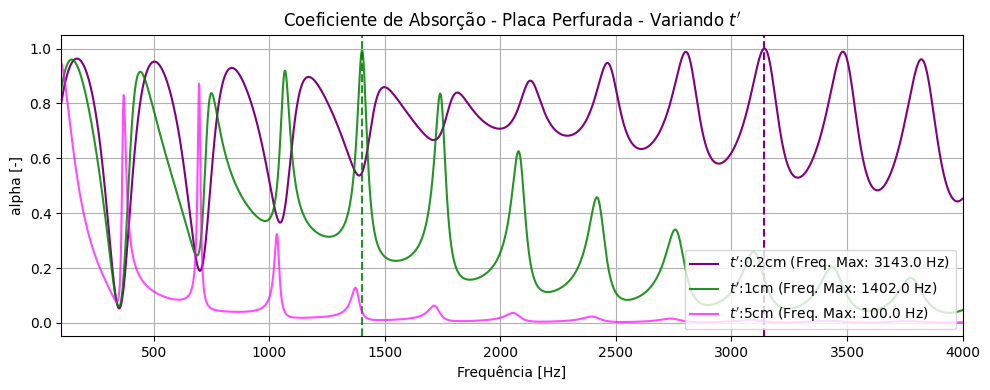

In [49]:
labels=['$t^{\prime}$:0.2cm','$t^{\prime}$:1cm','$t^{\prime}$:5cm']
colors = ['purple', 'green', 'magenta']
## Plot da Coeficiente de Absorção - Caso 1
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
for i,alpha in enumerate(alpha_case3):
    max_idx = np.argmax(alpha)
    max_freq = omega[max_idx]
    ax.plot(omega, alpha, label=f'{labels[i]} (Freq. Max: {max_freq:.1f} Hz)', color=colors[i], alpha=1 - i*0.15)
    ax.axvline(max_freq, color=colors[i], linestyle='--', alpha=1 - i*0.15)
ax.set_title('Coeficiente de Absorção - Placa Perfurada - Variando $t^{\prime}$')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([100,4000])
ax.grid(True)
ax.legend(loc='lower right')
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

## Caso 3: Variação da Espessura do Material Poroso $d_m$

In [42]:
## Definindo todas as Possibilidades de dm
all_d_m = [10e-3, 25e-3, 50e-3]
## Calculando o Coeficiente de Absorção
alpha_case4=[]
for d_m in all_d_m:
  Zspp_var = calc_Zspp(
      rho=rho_pm,
      K=K_pm,
      omega=omega,
      rho_0=rho_0,
      t_linha=t_linha_fixed,
      theta=theta_fixed,
      Z_0=Z_0,
      c_0=c_0,
      D=D_fixed,
      d_m=d_m
  )
  alpha_var = 1-(np.abs((Zspp_var-Z_0)/(Zspp_var+Z_0))**2)
  alpha_case4.append(alpha_var)

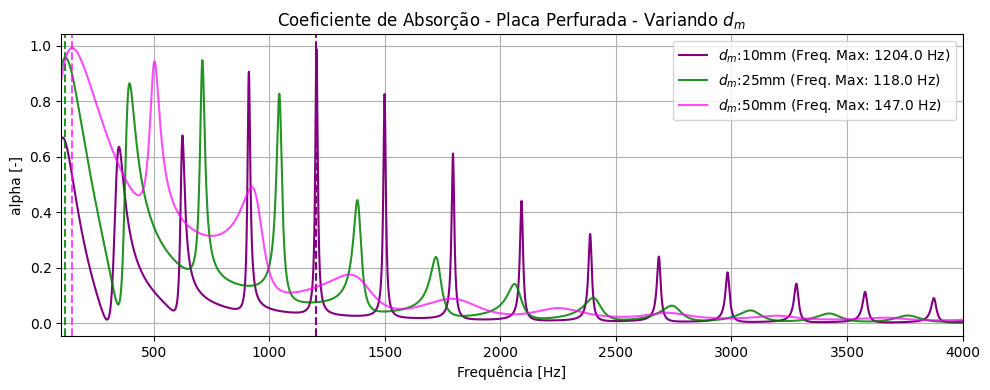

In [50]:
labels=['$d_m$:10mm','$d_m$:25mm','$d_m$:50mm']
colors = ['purple', 'green', 'magenta']
## Plot da Coeficiente de Absorção - Caso 1
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
for i,alpha in enumerate(alpha_case4):
    max_idx = np.argmax(alpha)
    max_freq = omega[max_idx]
    ax.plot(omega, alpha, label=f'{labels[i]} (Freq. Max: {max_freq:.1f} Hz)', color=colors[i], alpha=1 - i*0.15)
    ax.axvline(max_freq, color=colors[i], linestyle='--', alpha=1 - i*0.15)
ax.set_title('Coeficiente de Absorção - Placa Perfurada - Variando $d_m$')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([100,4000])
ax.grid(True)
ax.legend(loc='upper right')
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()